In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [12]:
def show_images(inp_img, out_img):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(inp_img, cv2.COLOR_BGR2RGB))
    plt.title('Source Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB))
    plt.title('Output Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

def save_image(img):
   cv2.imwrite('../data/out_images/mirror_result.png', img)

In [13]:
def mirror_effect(image):
    # Lấy kích thước ảnh
    height, width = image.shape[:2]

    # Tính điểm giữa (mid) và đảm bảo các phần khớp nhau
    mid = width // 2

    # Nếu chiều rộng lẻ, điều chỉnh kích thước cho nửa phải
    left_part = image[:, :mid]
    if width % 2 == 0:
        right_part = cv2.flip(left_part, 1)
    else:
        # Nếu ảnh có chiều rộng lẻ, lấy thêm 1 cột vào phần lật
        right_part = cv2.flip(image[:, :mid + 1], 1)

    # Tạo ảnh kết quả bằng cách ghép hai phần
    mirrored_image = np.hstack((left_part, right_part[:, :width - mid]))

    return mirrored_image

In [14]:
image = cv2.imread('../data/inp_images/tower.jpeg', cv2.IMREAD_UNCHANGED)

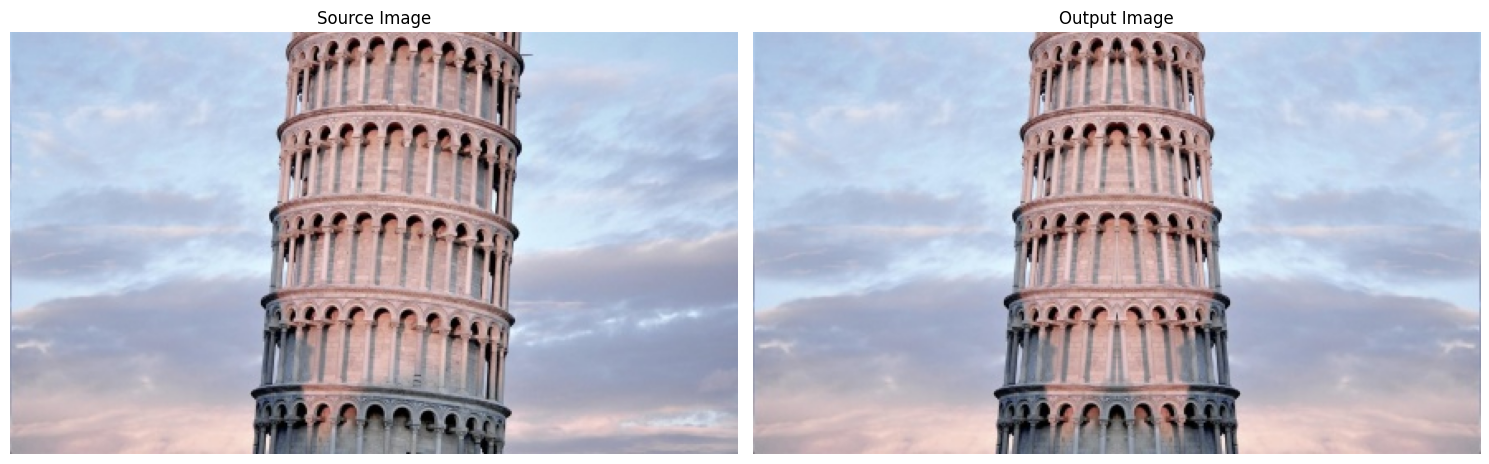

In [15]:
mirror_image = mirror_effect(image)
show_images(image, mirror_image)
save_image(mirror_image)